In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_excel("./Desktop/ntt data/consumo_material_clean.xlsx")
df.head()

CODIGO FECHAPEDIDO      NUMERO REFERENCIA  CANTIDADCOMPRA  \
0  E99808    01/01/23  1595724/23   178567.1              60   
1  B41691    01/02/16    72714/16     400403              40   
2  E64543    01/02/16    71961/16     403770              20   
3  E65007    01/02/16    72773/16      20415             100   
4  E64911    01/02/17    86159/17      20701             300   

   UNIDADESCONSUMOCONTENIDAS      PRECIO  IMPORTELINEA    TIPOCOMPRA   ORIGEN  \
0                         10   62.590000    375.540000  Compra menor   1-2-60   
1                         10  102.803729    411.214916  Compra menor   0-10-1   
2                          5   12.100000     48.400000  Compra menor  0-4-111   
3                         50  215.325000    430.650000      Concurso   0-10-1   
4                        300  792.000000    792.000000      Concurso    0-6-1   

           TGL                                           PRODUCTO  
0     TRANSITO        APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3  
1  ALMACENABLE  SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...  
2     TRANSITO                  APOSITO DE HIDROFIBRA  / CINTA-18  
3  ALMACENABLE           APOSITO DE ESPUMA POLIURETANO / SACRO-11  
4  ALMACENABLE                        APOSITO C/ CARBON Y PLATA-6

# Organització de les dades
### UNIDADESCONSUMOCONTENIDAS para cada CODIGO

In [91]:
aux = df[["CODIGO", "UNIDADESCONSUMOCONTENIDAS"]]
sizes_per_code = aux.groupby('CODIGO')['UNIDADESCONSUMOCONTENIDAS'].unique()
sizes_per_code

CODIGO
B40558             [1, 20]
B41691                [10]
C26183               [350]
C56207               [350]
E64488            [30, 50]
E64543            [5, 100]
E64544                [10]
E64663            [100, 5]
E64750      [50, 200, 500]
E64751    [400, 100, 2000]
E64761             [5, 16]
E64764          [300, 640]
E64765     [300, 480, 560]
E64898               [350]
E64911               [300]
E64932         [40, 10, 5]
E64940                [70]
E64946            [10, 60]
E64983           [10, 160]
E65007                [50]
E65056                 [3]
E65159              [1000]
E65201                [10]
E65485            [5, 240]
E65486                [10]
E65509            [10, 80]
E65894           [10, 140]
E66071           [10, 180]
E67462         [10, 5, 70]
E67835               [100]
E69682                [10]
E70130             [50, 5]
E73753            [10, 50]
E78950                [12]
E85758           [240, 10]
E85769           [10, 240]
E99807               

# Afegir columnes de mes, any, id_hospital i total_unitats

In [95]:
df['month'] = df['FECHAPEDIDO'].str[3:5]
df['year'] = df['FECHAPEDIDO'].str[-2:]
df['id_hospital'] = df['ORIGEN'].apply(lambda x: x.split('-')[1] if x.split('-')[0] == '0' else '20')
df['total_units'] = df['CANTIDADCOMPRA'] * df['UNIDADESCONSUMOCONTENIDAS']
df.head()

CODIGO FECHAPEDIDO      NUMERO REFERENCIA  CANTIDADCOMPRA  \
0  E99808    01/01/23  1595724/23   178567.1              60   
1  B41691    01/02/16    72714/16     400403              40   
2  E64543    01/02/16    71961/16     403770              20   
3  E65007    01/02/16    72773/16      20415             100   
4  E64911    01/02/17    86159/17      20701             300   

   UNIDADESCONSUMOCONTENIDAS      PRECIO  IMPORTELINEA    TIPOCOMPRA   ORIGEN  \
0                         10   62.590000    375.540000  Compra menor   1-2-60   
1                         10  102.803729    411.214916  Compra menor   0-10-1   
2                          5   12.100000     48.400000  Compra menor  0-4-111   
3                         50  215.325000    430.650000      Concurso   0-10-1   
4                        300  792.000000    792.000000      Concurso    0-6-1   

           TGL                                           PRODUCTO month year  \
0     TRANSITO        APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3    01   23   
1  ALMACENABLE  SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...    02   16   
2     TRANSITO                  APOSITO DE HIDROFIBRA  / CINTA-18    02   16   
3  ALMACENABLE           APOSITO DE ESPUMA POLIURETANO / SACRO-11    02   16   
4  ALMACENABLE                        APOSITO C/ CARBON Y PLATA-6    02   17   

  id_hospital  total_units  
0          20          600  
1          10          400  
2           4          100  
3          10         5000  
4           6        90000

In [74]:
total = [res.split('-')[1] for res in origen if res.split('-')[0] == "0"]

for h in hospitals_0:
    print(h, total.count(h))


13 1002
4 1237
5 49
12 634
9 42
8 583
19 2
0 2268
14 592
11 977
10 4112
1 57
17 7
15 187
18 3223
6 343
7 290
16 1
3 40


In [97]:
years = df['FECHAPEDIDO'].str[-2:].unique()
print(years)

['23' '16' '17' '18' '19' '21' '22' '15' '20']


In [98]:
letters = ['B', 'C', 'E', 'F']

df_by_letter = dict()

for l in letters:
    df_by_letter[l] = df.loc[df['CODIGO'].str.startswith(l)]

In [111]:
codis = df['CODIGO'].unique()
print(len(codis))

48


# Correlació

Product pairs with correlation > 0.75:


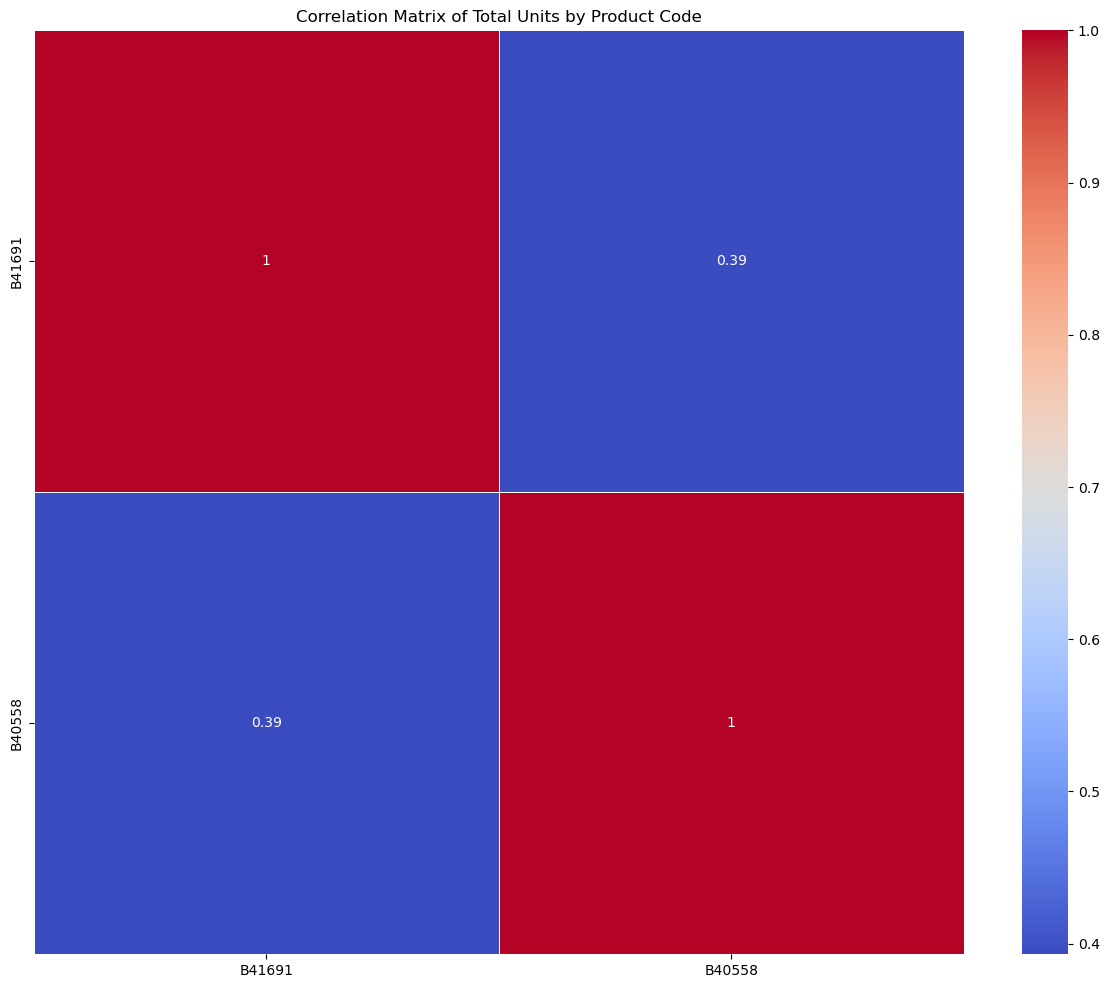

Product pairs with correlation > 0.75:


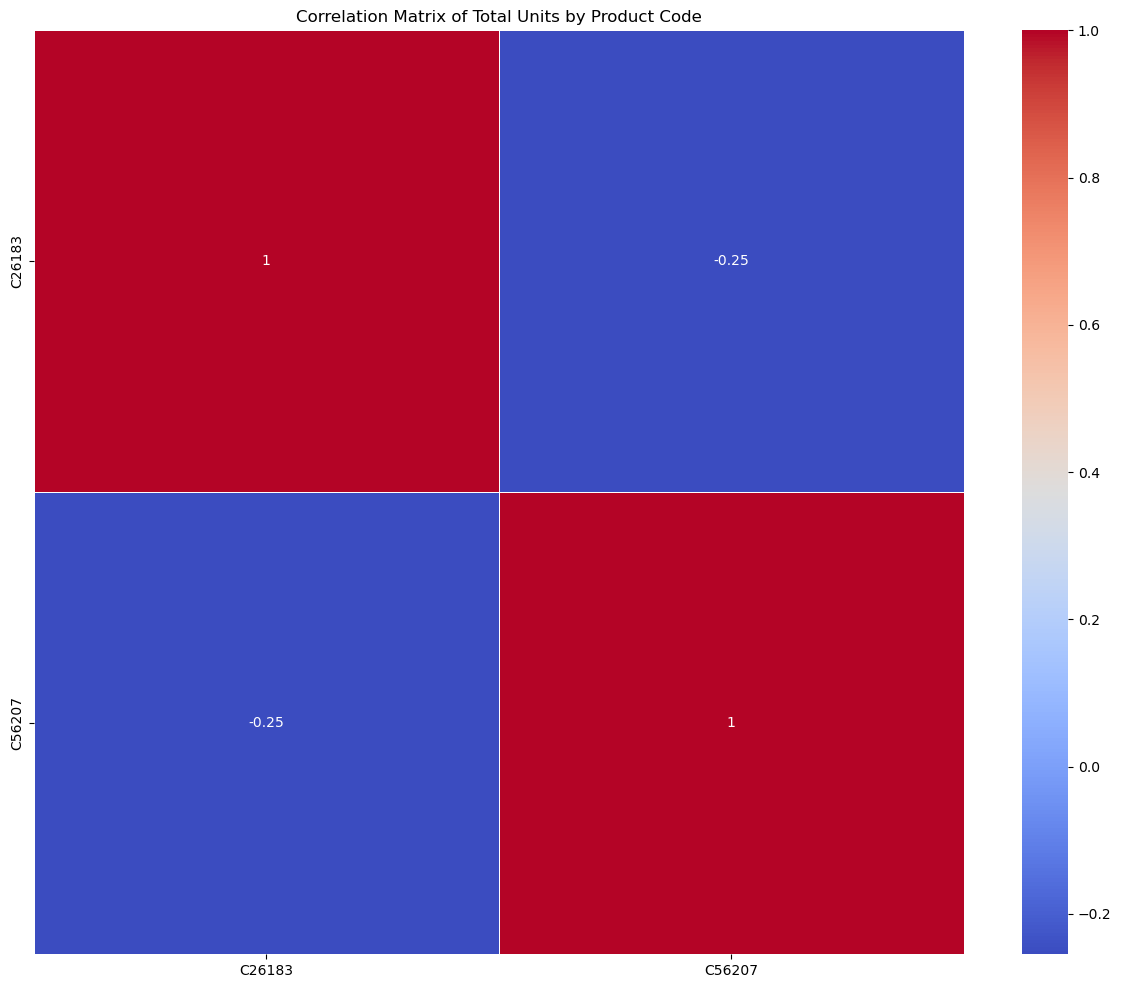

Product pairs with correlation > 0.75:
E64932 and E99808: 0.7766002681990307
E64932 and E99807: 0.7568137659418644
E78950 and E99807: 0.8264117890642222
E99807 and E99808: 0.7671740670139494
E64544 and E99808: 0.7621602469115469
E64544 and E78950: 0.7828274254299136
E64544 and E99807: 0.8641419112350082
E85758 and E99808: 0.7517094876257282


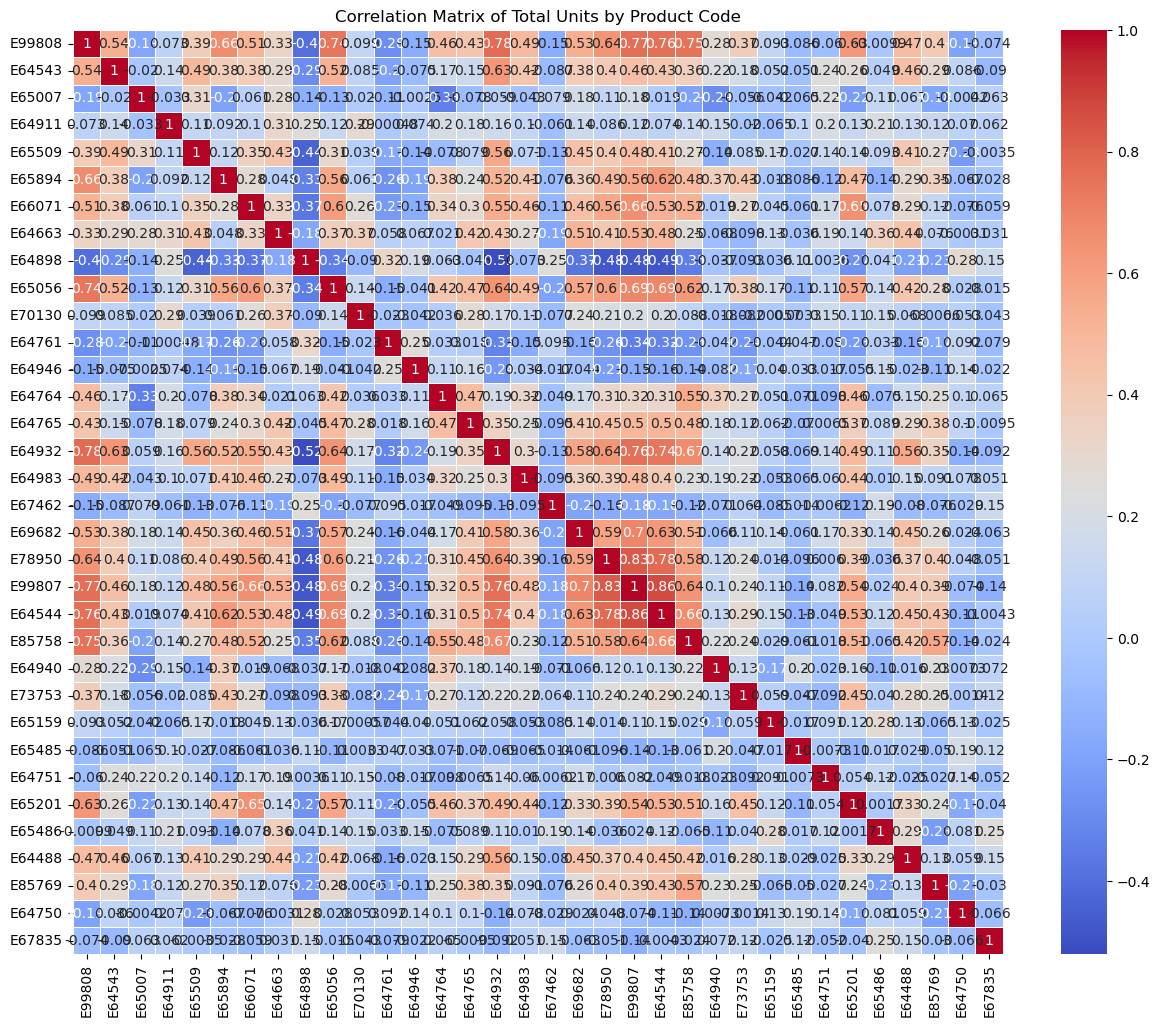

Product pairs with correlation > 0.75:
F46843 and F46846: 0.7892747781956544


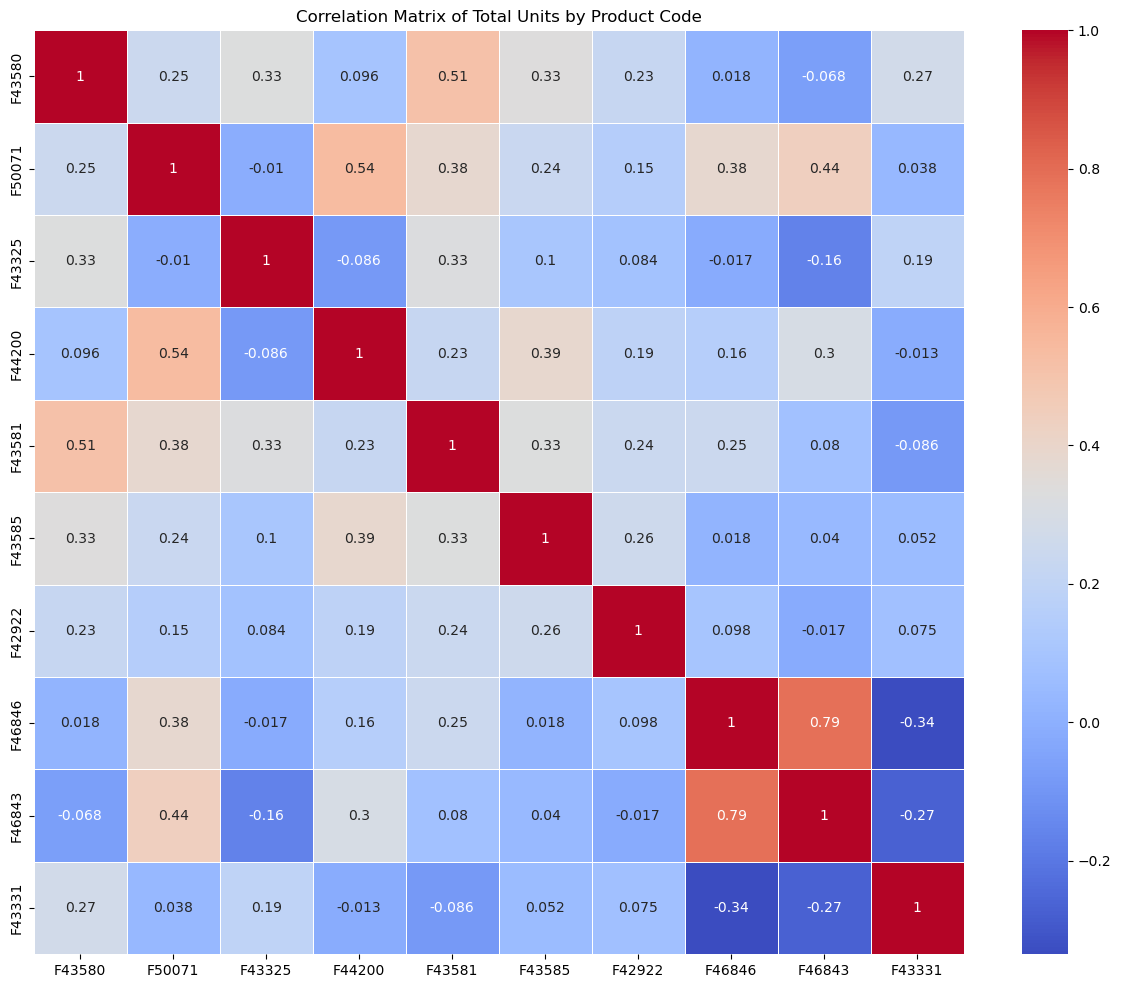

In [139]:
# Dins cada categoria

for letter, dataset in df_by_letter.items():
    # Obtinc la suma de cada producte
    aux = dataset.copy()
    aux = aux.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()
    
    # Create a pivot table
    pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

    #print(pivot_table)
    
    # Extract vectors for each product code
    vectors = {}
    for code in dataset['CODIGO'].unique():
        code_data = pivot_table.loc[code]
        vectors[code] = code_data.values.flatten()
        
    #print(vectors)

    # Compute the correlation matrix
    correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
    for code1 in vectors.keys():
        for code2 in vectors.keys():
            correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
            
            
    # Find pairs with correlation over 0.75
    high_correlation_pairs = []
    for code1 in vectors.keys():
        for code2 in vectors.keys():
            if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
                high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

    # Print the high correlation pairs
    print("Product pairs with correlation > 0.75:")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]}")
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix of Total Units by Product Code')
    plt.show()


Product pairs with correlation > 0.75:
B and F: 0.7723073707951934


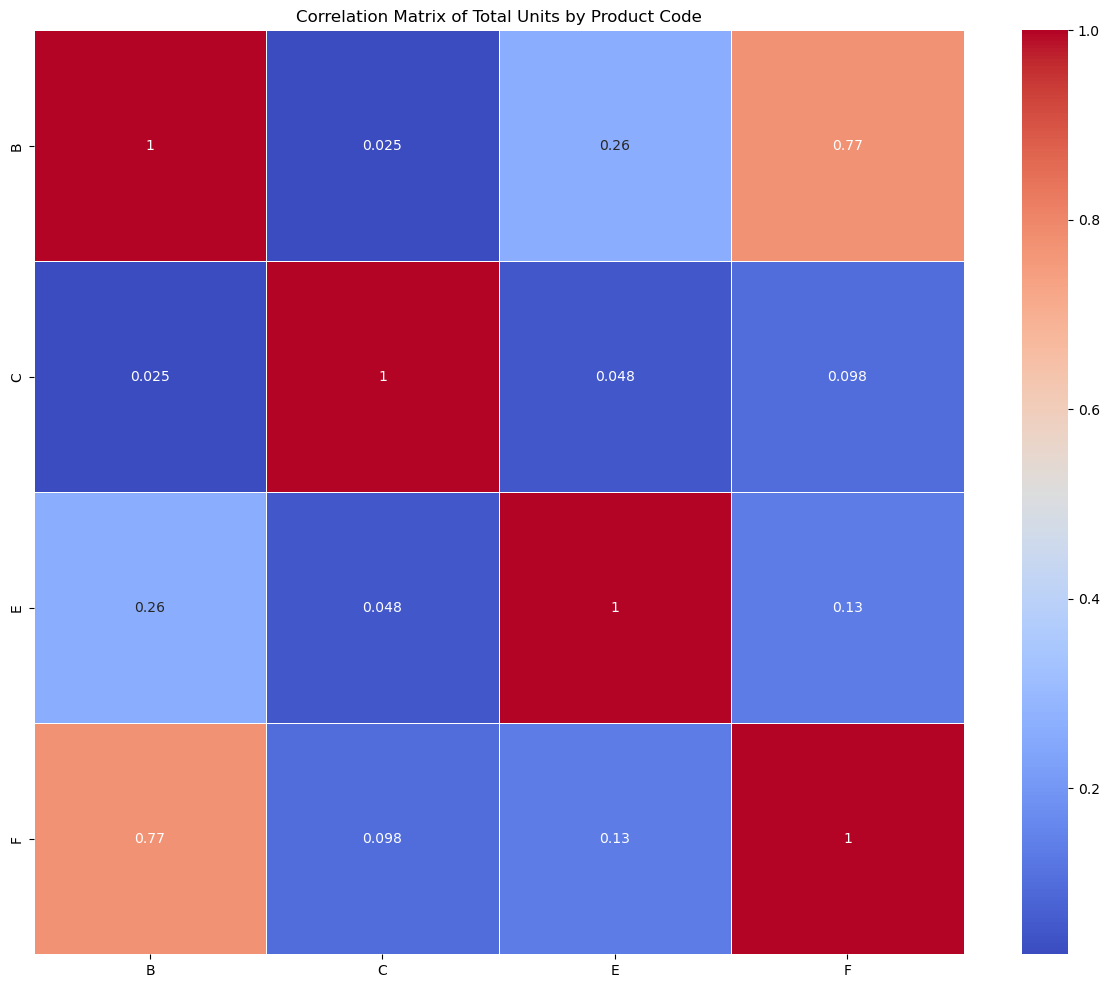

In [140]:
# Entre categories

# Obtinc la suma de cada producte
dataset = df.copy()
dataset['CODIGO'] = dataset['CODIGO'].str[0]
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Total Units by Product Code')
plt.show()


Product pairs with correlation > 0.75:
B41691 and F43580: 0.7576560556840913
F46843 and F46846: 0.8135671186014093


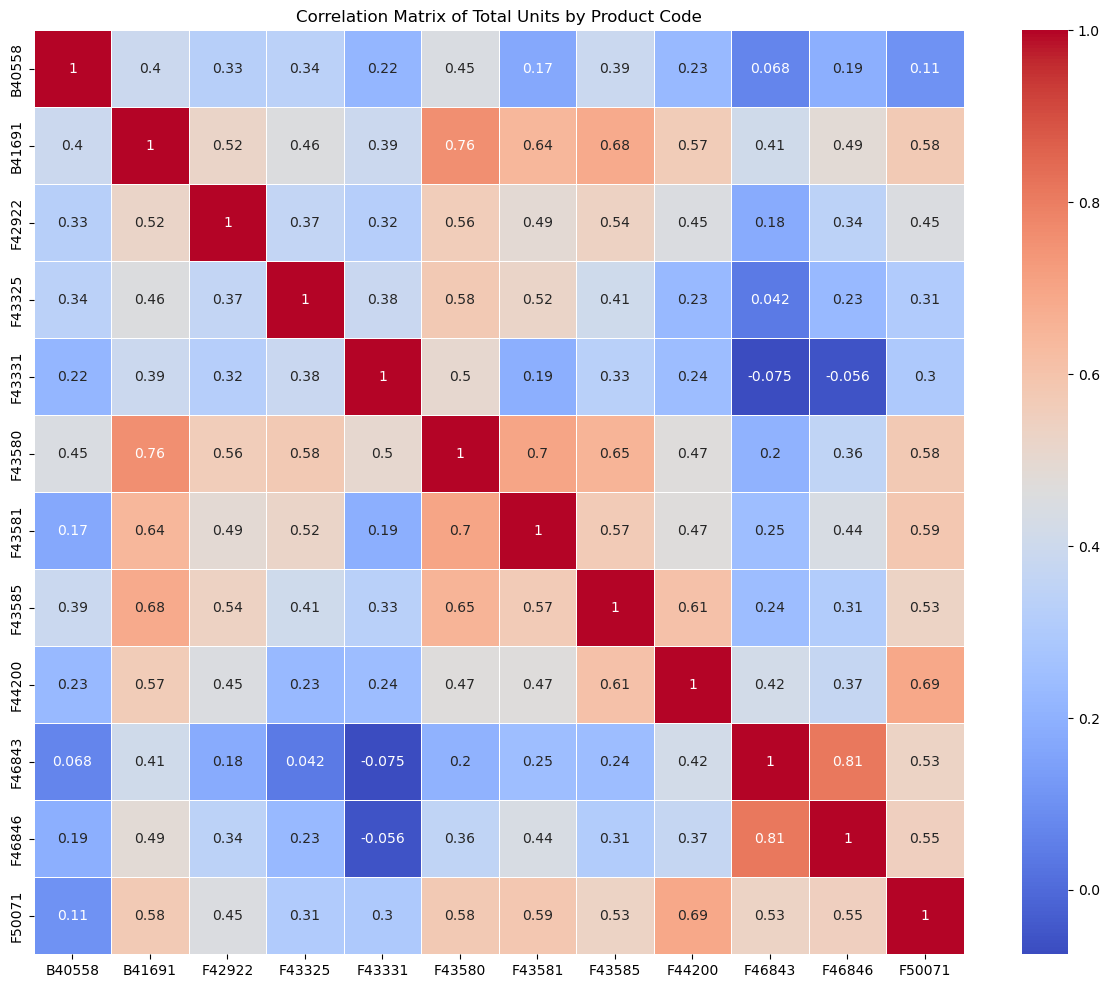

In [144]:
# B i F conjuntament

# Dins cada categoria

# Obtinc la suma de cada producte
dataset = pd.concat([df_by_letter['B'], df_by_letter['F']], ignore_index=True)
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Total Units by Product Code')
plt.show()

In [145]:
# TOTS CONTRA TOTS
# Entre categories

# Obtinc la suma de cada producte
dataset = df.copy()
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Product pairs with correlation > 0.75:
B41691 and E64544: 0.7986285827591558
B41691 and E78950: 0.8409133356202015
B41691 and E99807: 0.8780590976702828
B41691 and F43580: 0.7576560556840913
E64544 and E78950: 0.7828274254299136
E64544 and E99807: 0.8641419112350082
E64544 and E99808: 0.7621602469115469
E64932 and E99807: 0.7568137659418644
E64932 and E99808: 0.7766002681990307
E78950 and E99807: 0.8264117890642222
E78950 and F43580: 0.7502396874152467
E85758 and E99808: 0.7517094876257282
E99807 and E99808: 0.7671740670139494
F46843 and F46846: 0.8135671186014093


# Visualitzar seasonality

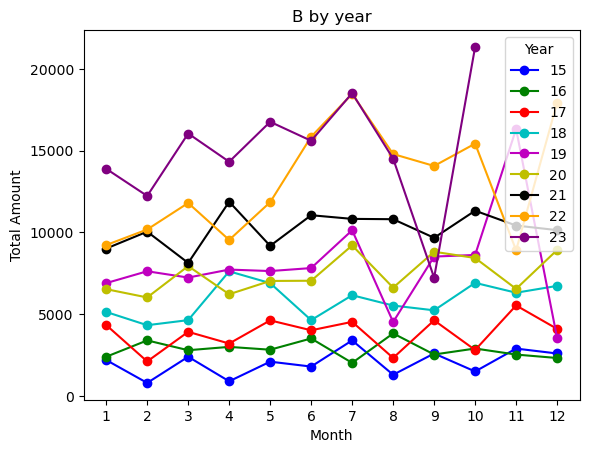

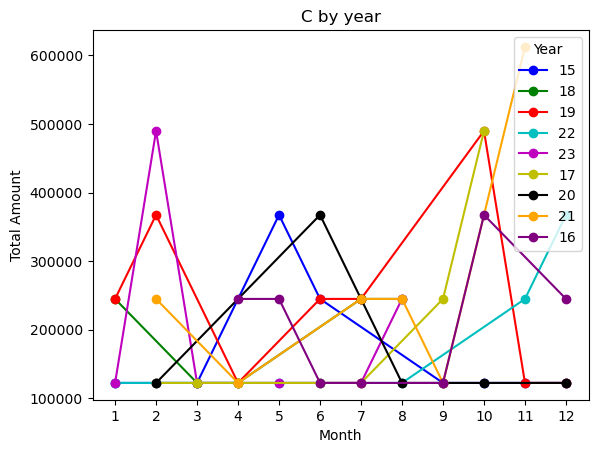

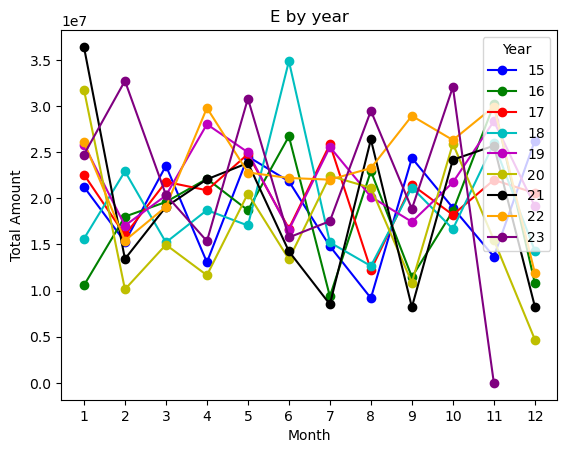

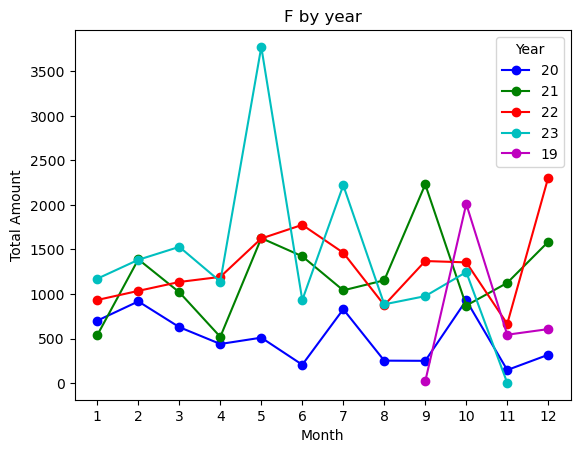

In [121]:
for letter, dataset in df_by_letter.items():

    grouped_df = dataset.groupby(['month', 'year'])['total_units'].sum().reset_index()
    
    grouped_df['month'] = pd.to_numeric(grouped_df['month'])
    grouped_df = grouped_df.sort_values(['month'])
    # Plot the data
    python_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
    # Connect the dots
    for year, color in zip(grouped_df['year'].unique(), python_colors):
        year_data = grouped_df[grouped_df['year'] == year]
        plt.plot(year_data['month'], year_data['total_units'], marker='o', linestyle='-', color=color, label=str(year))


    plt.title(f'{letter} by year')
    plt.xlabel('Month')
    plt.ylabel('Total Amount')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13))
    plt.show()


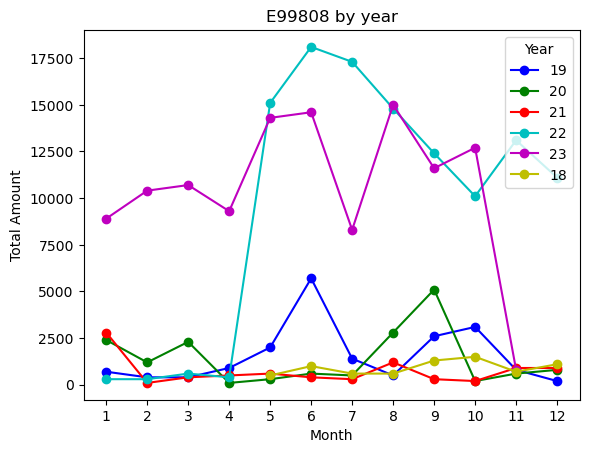

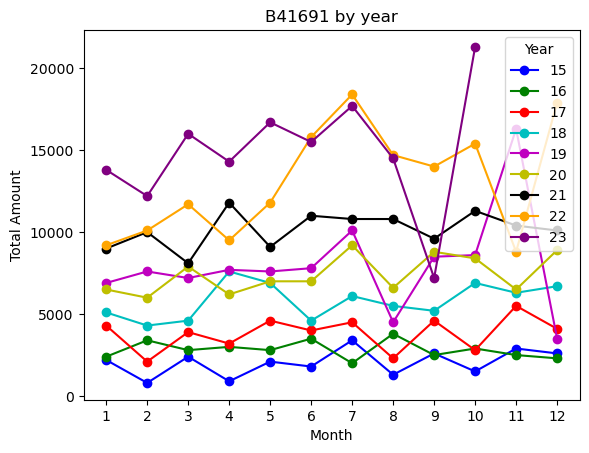

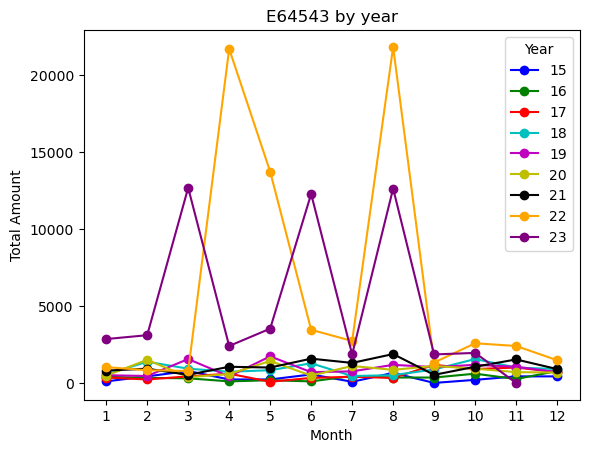

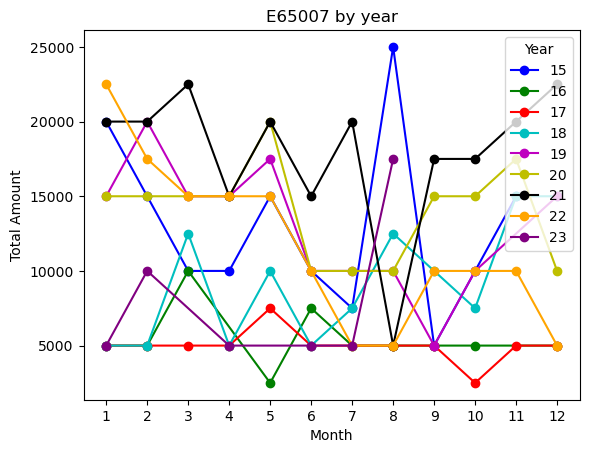

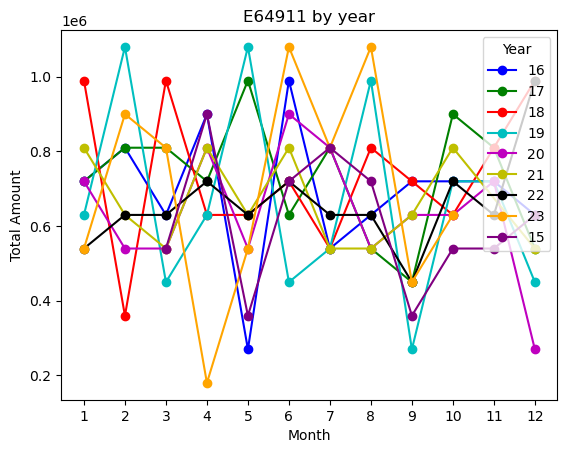

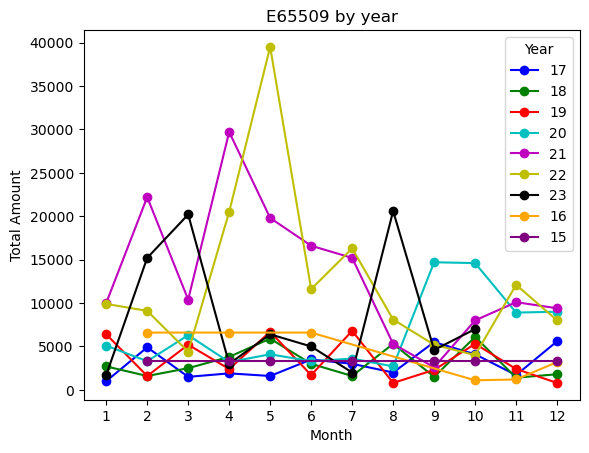

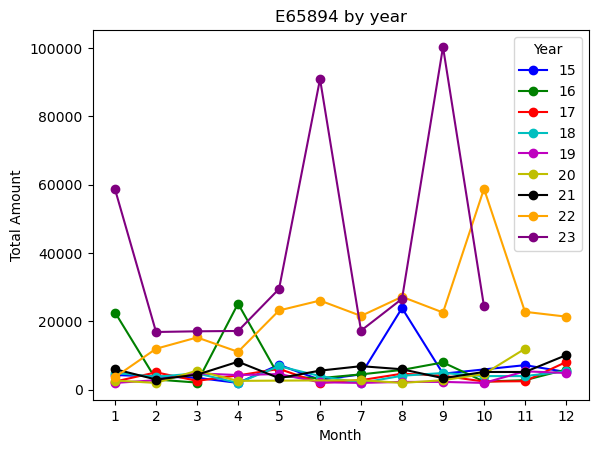

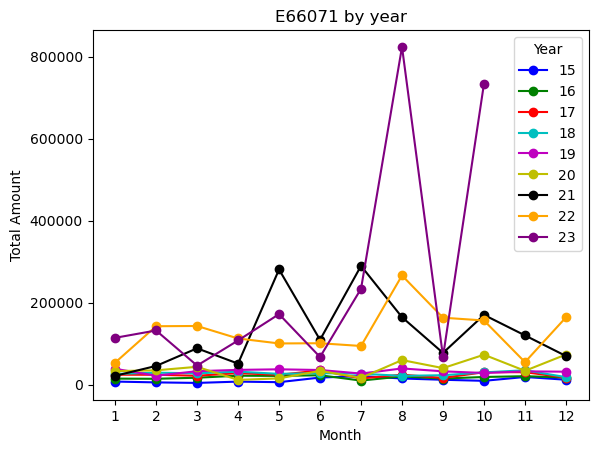

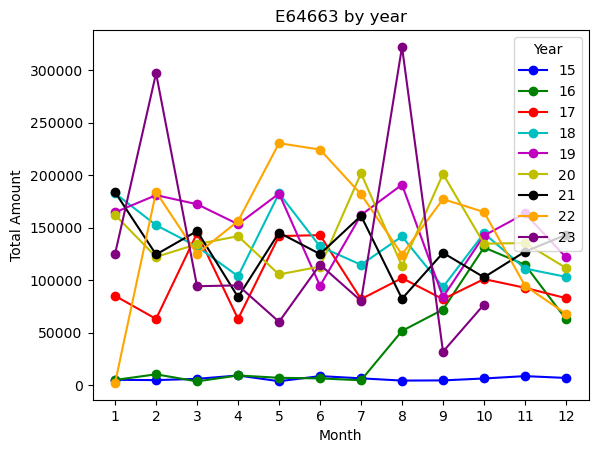

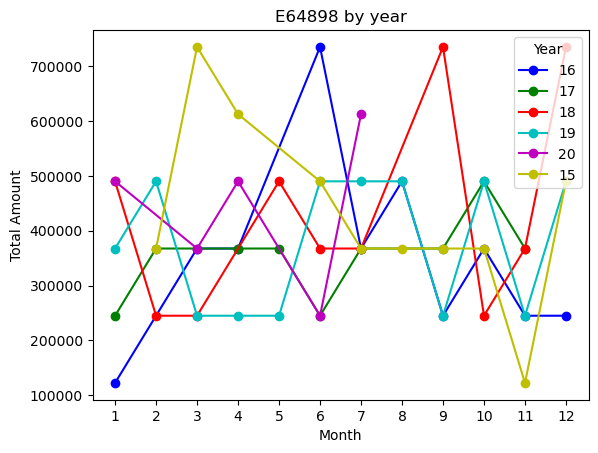

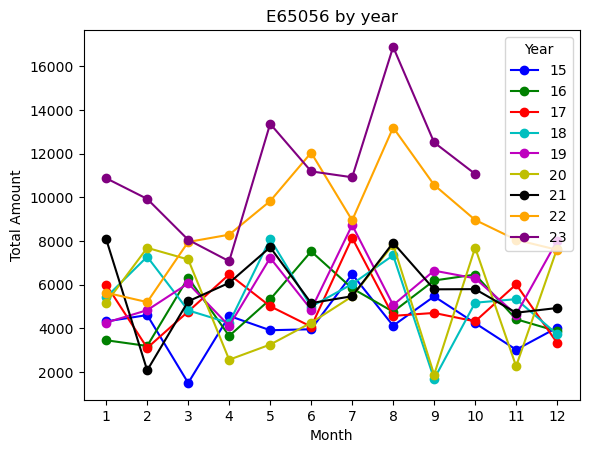

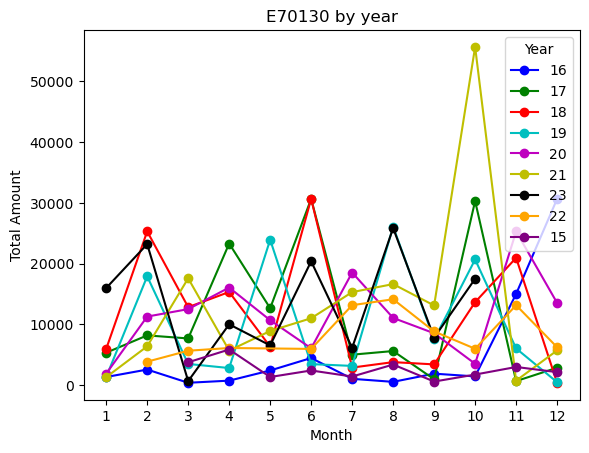

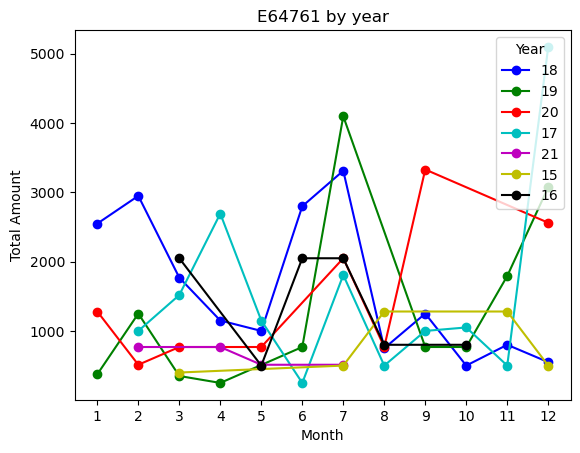

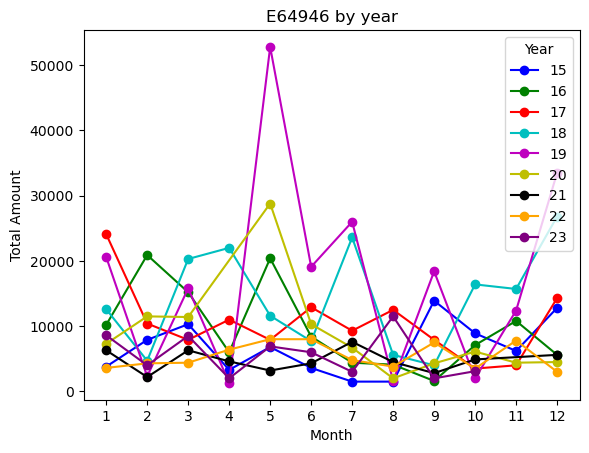

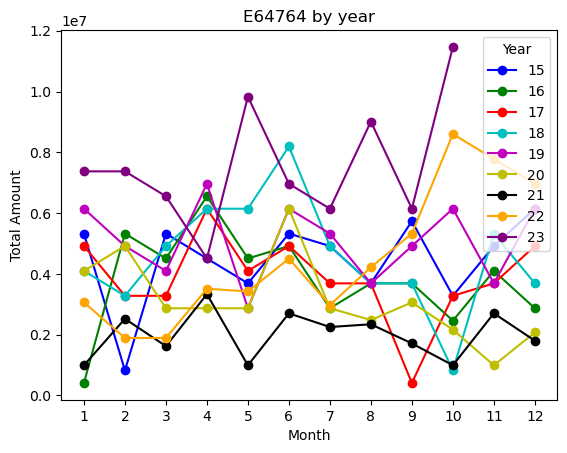

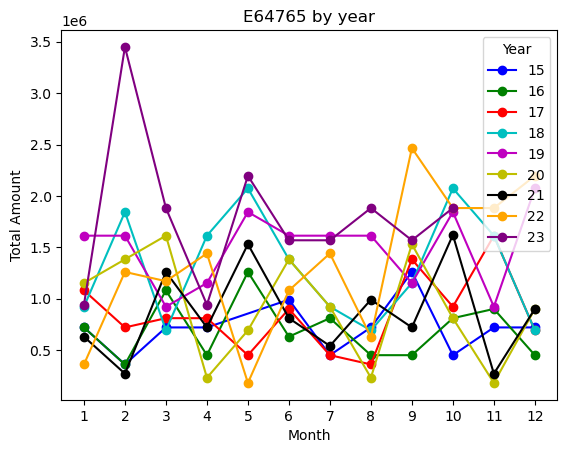

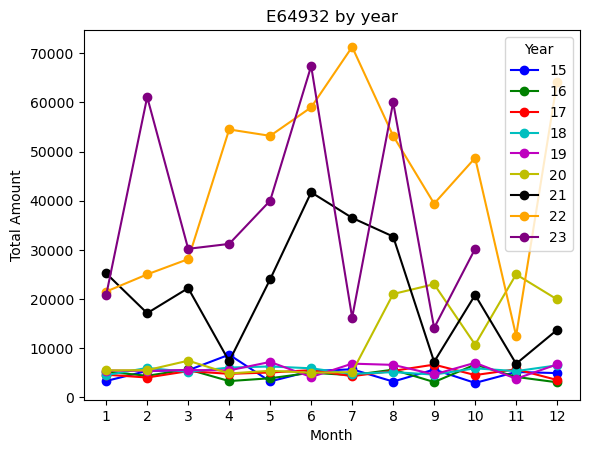

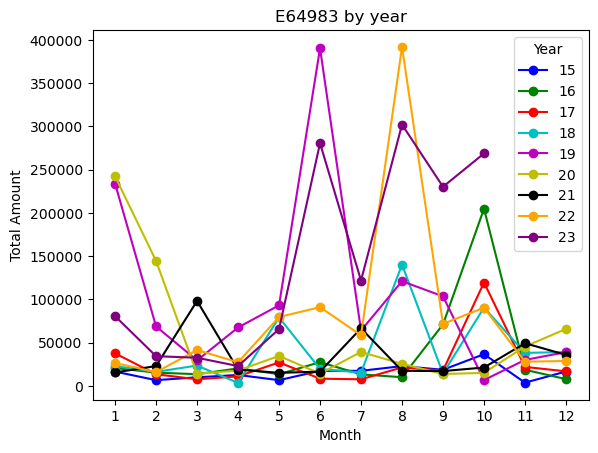

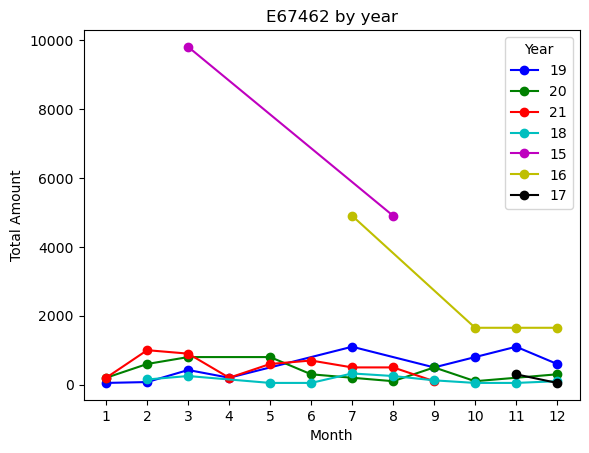

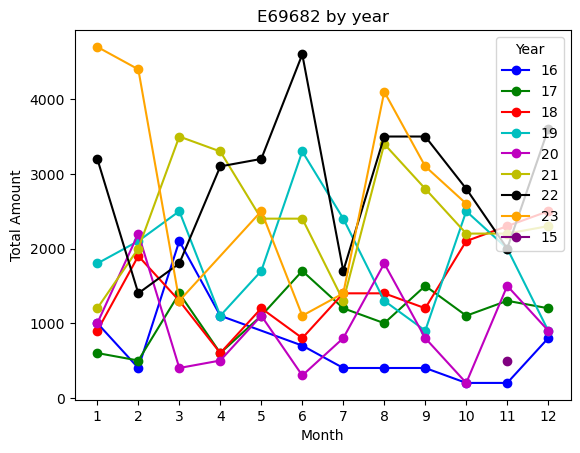

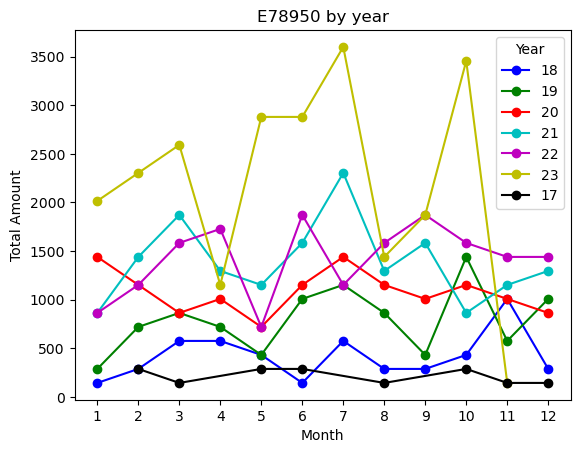

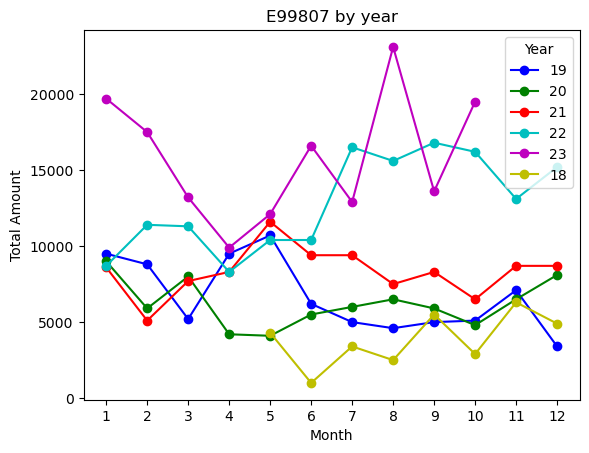

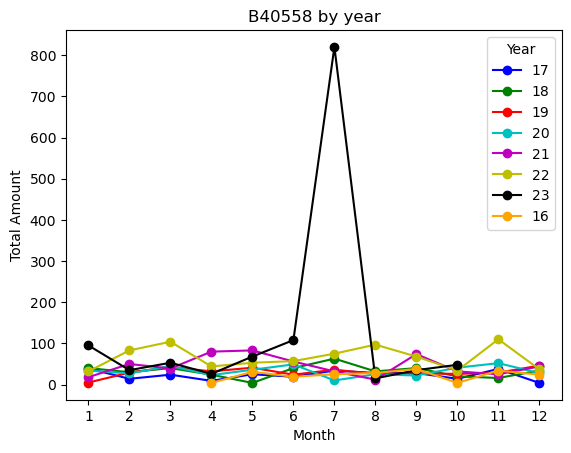

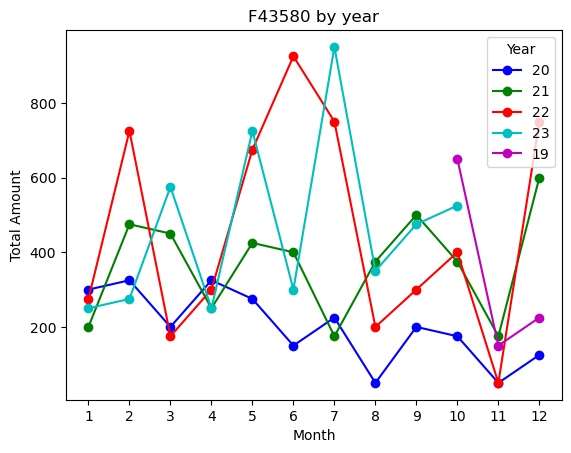

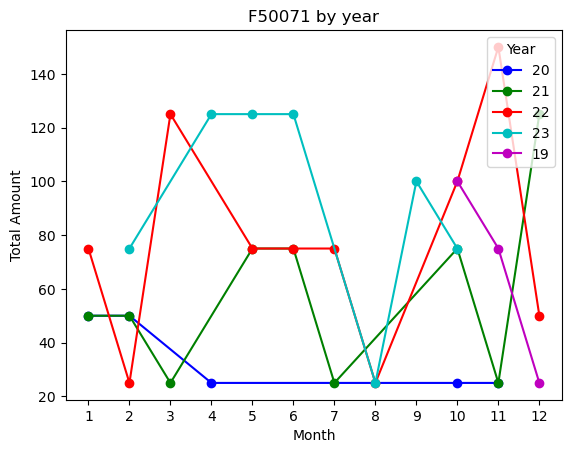

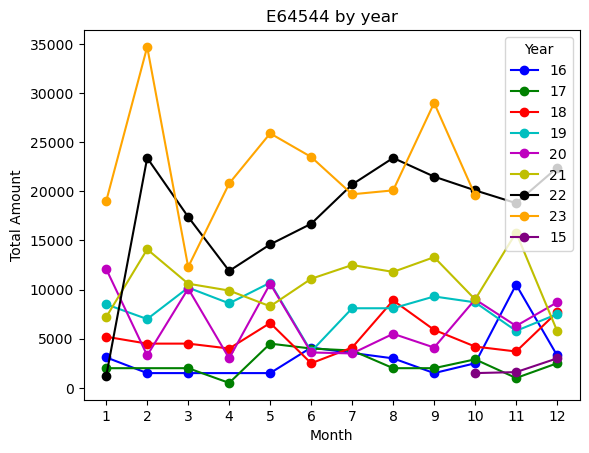

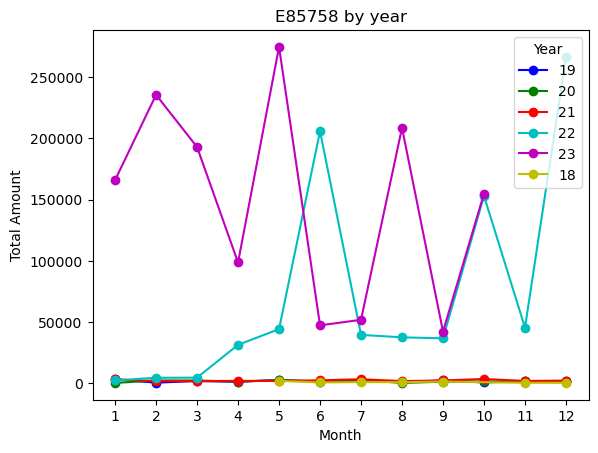

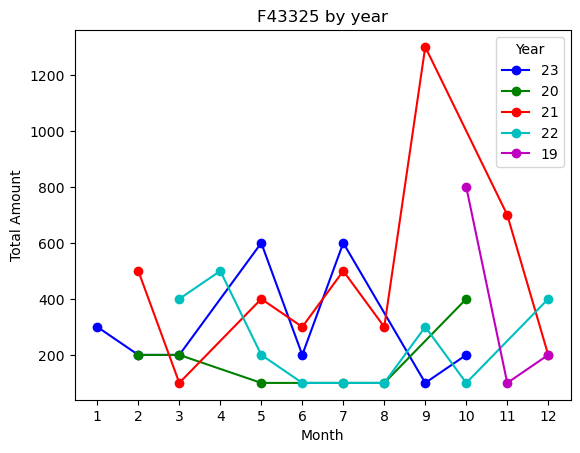

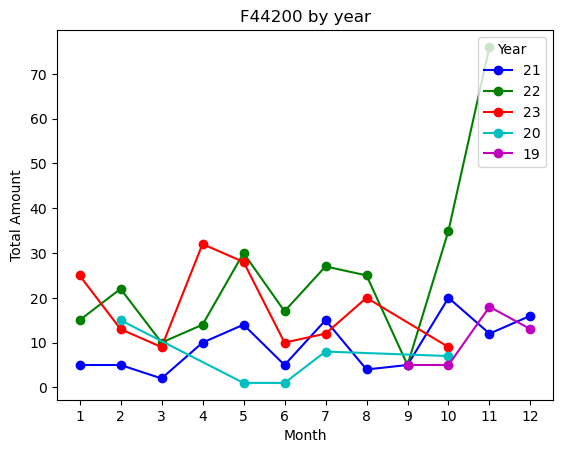

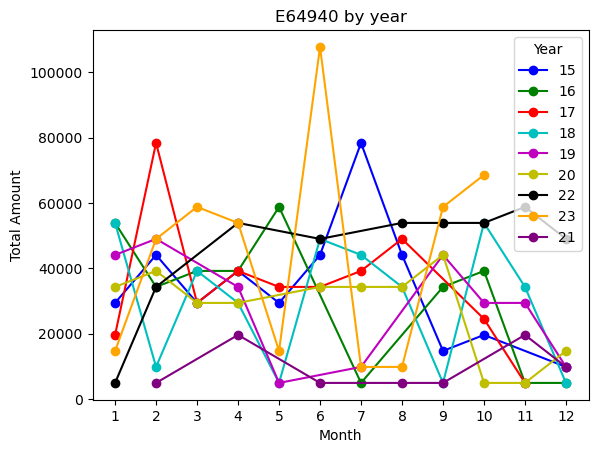

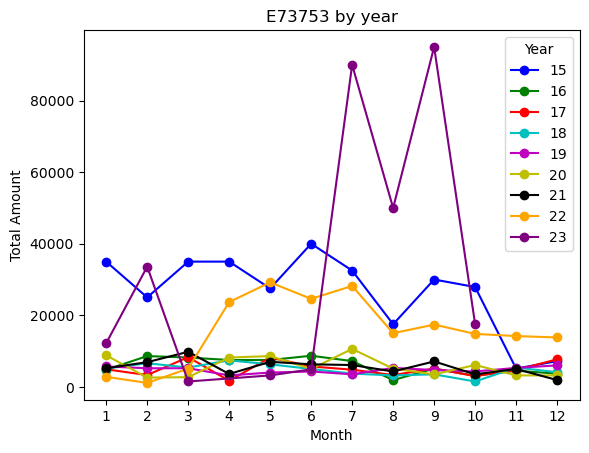

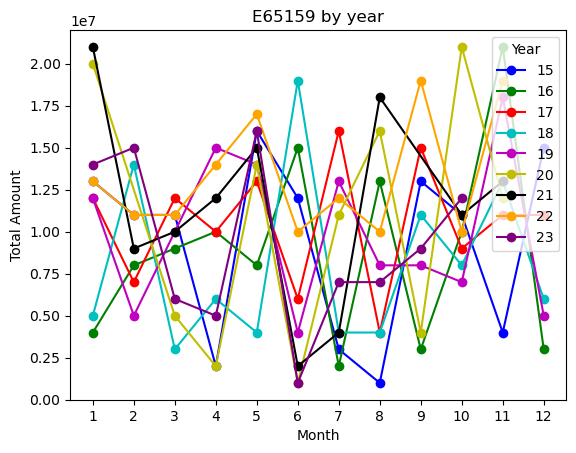

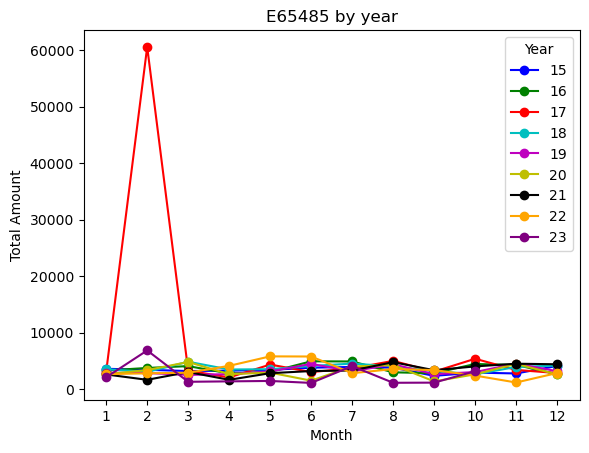

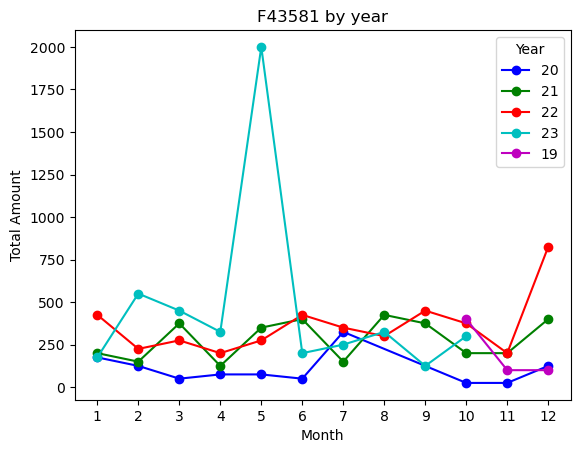

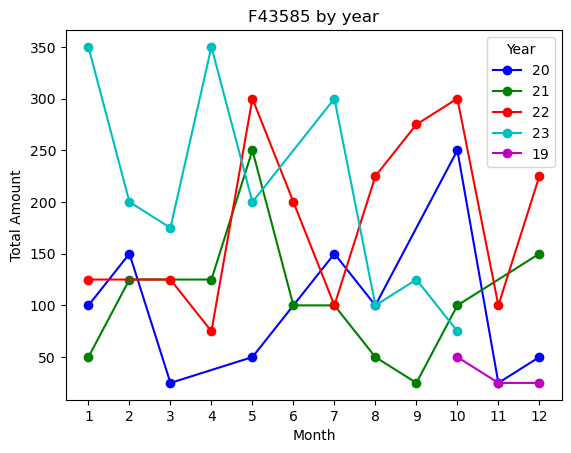

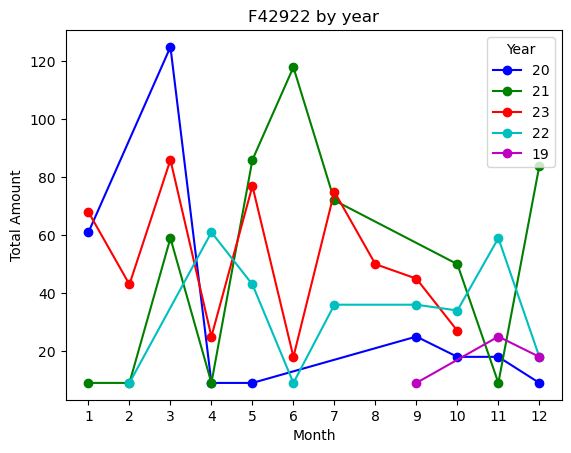

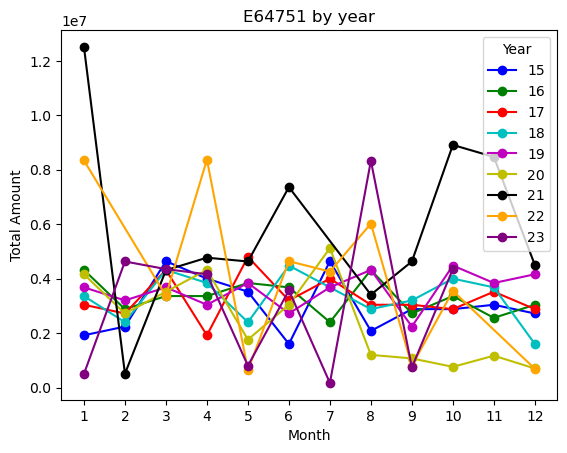

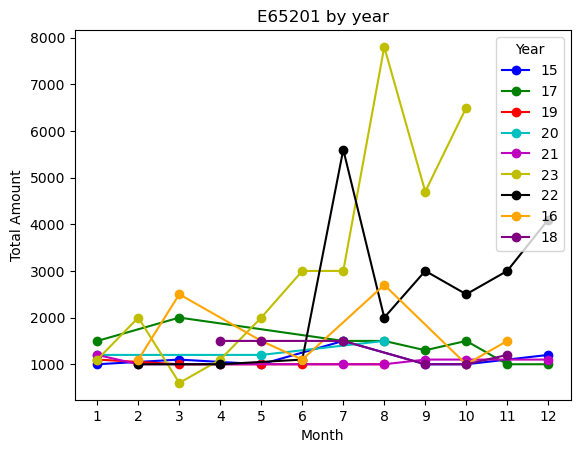

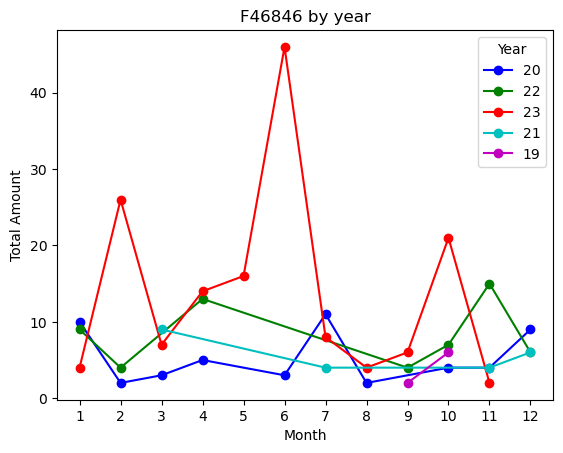

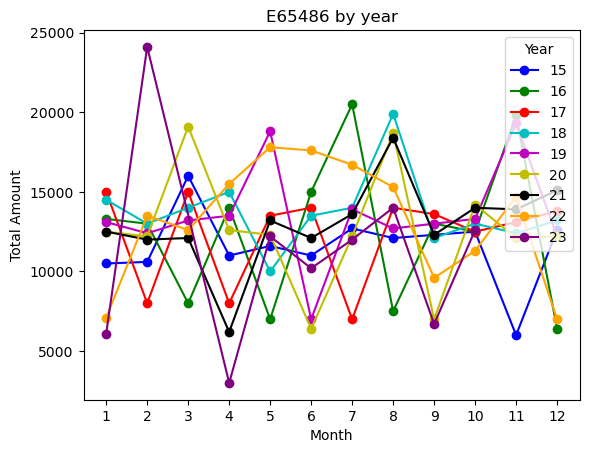

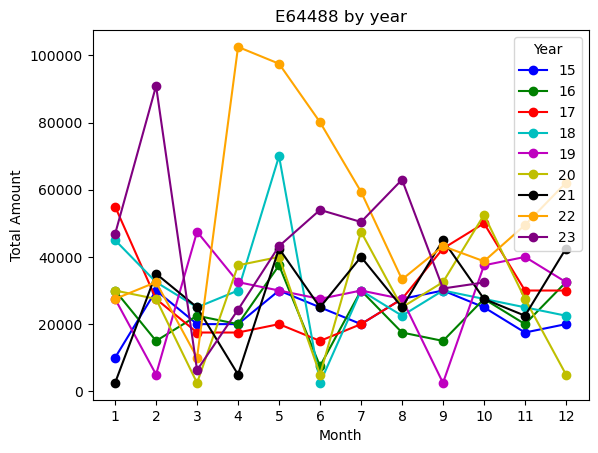

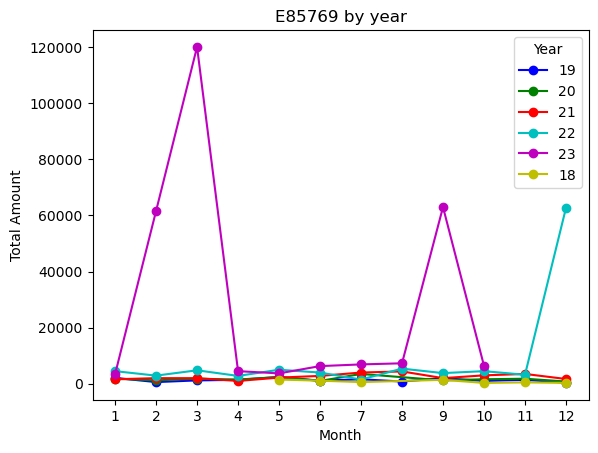

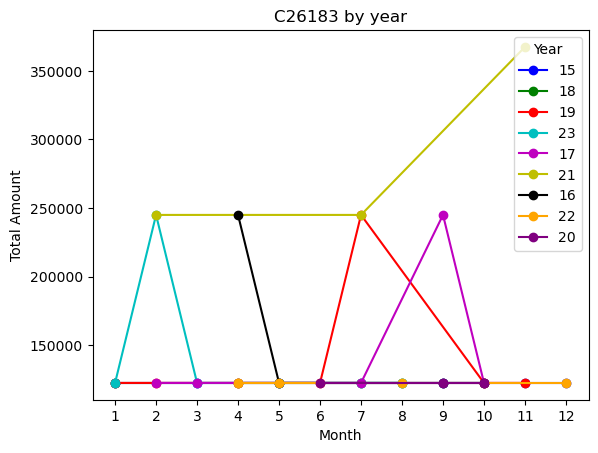

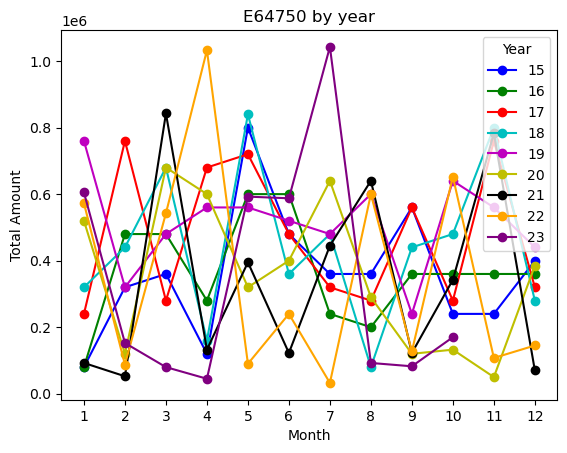

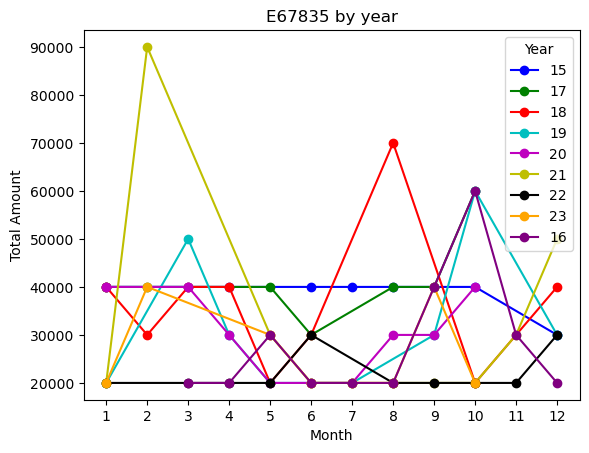

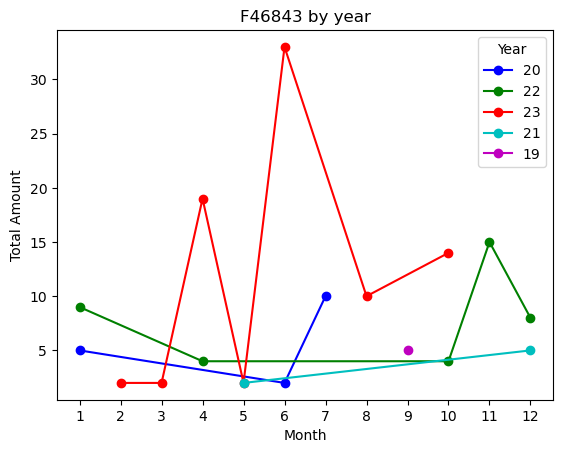

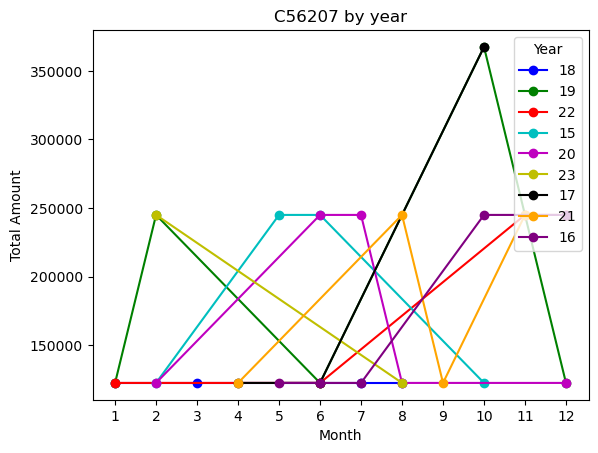

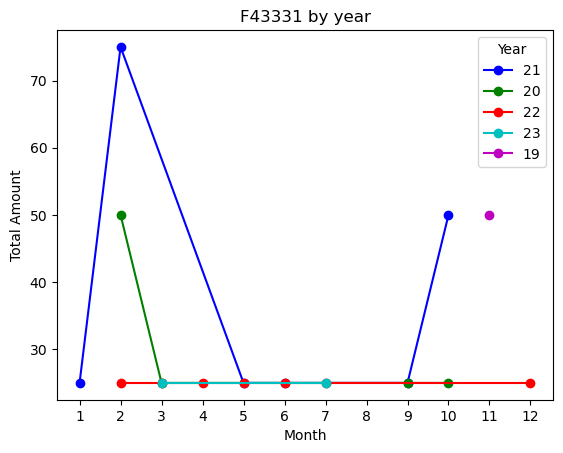

In [123]:
for p in codis:
    dataset = df.loc[df['CODIGO'] == p]

    grouped_df = dataset.groupby(['month', 'year'])['total_units'].sum().reset_index()
    
    grouped_df['month'] = pd.to_numeric(grouped_df['month'])
    grouped_df = grouped_df.sort_values(['month'])
    
    # Plot the data
    python_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
    # Connect the dots
    for year, color in zip(grouped_df['year'].unique(), python_colors):
        year_data = grouped_df[grouped_df['year'] == year]
        plt.plot(year_data['month'], year_data['total_units'], marker='o', linestyle='-', color=color, label=str(year))


    plt.title(f'{p} by year')
    plt.xlabel('Month')
    plt.ylabel('Total Amount')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13))
    plt.show()
